## Table of Contents:
1. [Introduction](#1.-Introduction)
    
    
2. [Data](#2.-Data)
    
    2.1. [Import Libraries & Data Loading](#2.1.-Import-Libraries-&-Data-Loading)

    2.2. [Data Cleaning](#2.2.-Data-Cleaning)
    
    
3. [Descriptive Statistics](#3.-Descriptive-Statistics)
 
    3.1. [Measures of central tendency](#3.1.-Measures-of-central-tendency)
    
    3.2. [Measures of variability](#3.2.-Measures-of-variability)
    
    3.3 [Data distribution](#3.3.-Data-distribution)

# 1. Introduction

This notebook will focus mainly on the aspect "if this is true that the smarter population, the more % of the population vaccinated".

# 2. Data

## 2.1. Import Libraries & Data Loading

In [72]:
import folium 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
from statsmodels import robust


In [70]:
Vaccine = pd.read_excel('Worldwide Vaccine Data.xlsx')
Vaccine.head(5)

,Country,country code,latitude,longitude,Doses administered per 100 people,Total doses administered,% of population fully vaccinated,% of population vaccinated
0,Afghanistan,AF,33.9391,67.7100,15,5872684,14.0000,12.0000
1,Albania,AL,41.1533,20.1683,97,2773475,45.0000,43.0000
2,Algeria,DZ,28.0339,1.6596,32,13704895,17.0000,14.0000
3,Angola,AO,-11.2027,17.8739,55,17535411,35.0000,19.0000
4,Argentina,AR,-38.4161,-63.6167,216,97181658,91.0000,82.0000


In [42]:
Vaccine.shape # rows & columns

(187, 8)

## 2.2. Data Cleaning

In [43]:
#print(os.listdir()) the file that we have in the folder

In [44]:
Vaccine.isnull().sum()

Country                              0
country code                         1
latitude                             0
longitude                            0
Doses administered per 100 people    0
Total doses administered             0
% of population fully vaccinated     0
% of population vaccinated           0
dtype: int64

* ###  Step 1: Detecting NA

In [45]:
missing_value = ["NA", np.nan]
Vaccine = pd.read_excel('Worldwide Vaccine Data.xlsx', na_values = missing_value)
Vaccine.isnull().sum()

Country                              0
country code                         1
latitude                             0
longitude                            0
Doses administered per 100 people    0
Total doses administered             0
% of population fully vaccinated     0
% of population vaccinated           0
dtype: int64

In [46]:
Vaccine.isnull().any() #any check if any is null, TRUE we have

Country                              False
country code                          True
latitude                             False
longitude                            False
Doses administered per 100 people    False
Total doses administered             False
% of population fully vaccinated     False
% of population vaccinated           False
dtype: bool

####  Visualization the values

<AxesSubplot:>

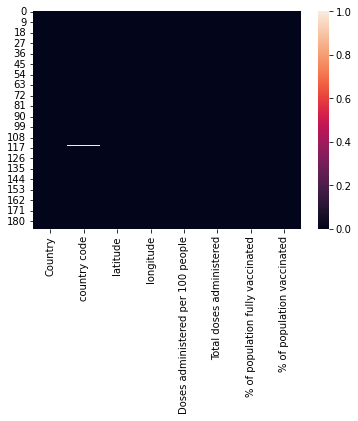

In [47]:
#sns.heatmap(Vaccine.isnull()) with ylabels
#sns.heatmap(Vaccine.isnull(), yticklabels = False, annot=True) #annot gives the value 0 if is not null , 1 if it is null
sns.heatmap(Vaccine.isnull())

* ### Step 2: Replaced NA values

In [48]:
## NA is not a NA value is a country code od Nambia
Vaccine.fillna('NA.', inplace = True)
# Vaccine.isnull().sum().sum() #check if the null in dataset right now

In [49]:
Vaccine[108:120]

,Country,country code,latitude,longitude,Doses administered per 100 people,Total doses administered,% of population fully vaccinated,% of population vaccinated
108,Mexico,MX,23.6345,-102.5528,150,191907868,67.0000,62.0000
109,Moldova,MD,47.4116,28.3699,80,2131054,41.0000,40.0000
110,Mongolia,MN,46.8625,103.8467,170,5480965,70.0000,67.0000
111,Montenegro,ME,42.7087,19.3744,108,669505,47.0000,45.0000
112,Morocco,MA,31.7917,-7.0926,149,54308312,68.0000,64.0000
113,Mozambique,MZ,-18.6657,35.5296,92,27843440,47.0000,44.0000
114,Myanmar,MM,21.9140,95.9562,94,50579710,51.0000,41.0000
115,Namibia,NA.,-22.9576,18.4904,34,839674,18.0000,15.0000
116,Nepal,NP,28.3949,84.1240,141,40406877,77.0000,67.0000
117,Netherlands,NL,52.1326,5.2913,197,34190553,78.0000,72.0000


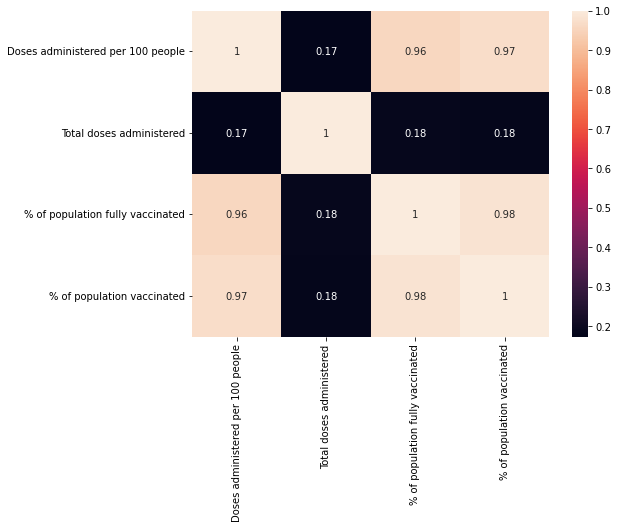

In [50]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].corr(method = 'pearson'), annot = True)
plt.show()

# 3. Descriptive Statistics

## 3.1. Measures of central tendency

* ### Mean 

In [51]:
mean = Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].mean()
pd.set_option('display.float_format', lambda x: '%0.4f' % x) # Scientific Notation to floats using Panda
mean

Doses administered per 100 people        122.7861
Total doses administered            60791544.4973
% of population fully vaccinated          55.1016
% of population vaccinated                49.5840
dtype: float64

* ### Trimmed mean (a variation of the mean)

In [52]:
trimMean = stats.trim_mean(Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']], 0.1)
trim = list(trimMean)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
trim

[122.3841059602649, 16642664.251655629, 56.496688741721854, 50.397350993377486]

* ### Weighted mean

In [53]:
np.average(Vaccine[['% of population fully vaccinated']], weights = Vaccine[['Total doses administered']])

78.25803431957567

* ### Median 

In [54]:
median = Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].median()
median

Doses administered per 100 people       124.0000
Total doses administered            7580976.0000
% of population fully vaccinated         61.0000
% of population vaccinated               54.0000
dtype: float64

## 3.2. Measures of variability

* ### Standard deviation

In [60]:
sd = Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].std()
sd

Doses administered per 100 people          75.0232
Total doses administered            281859258.8680
% of population fully vaccinated           27.2713
% of population vaccinated                 26.7800
dtype: float64

* ### Quantile & Interquartile range

In [62]:
q75 =  Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].quantile(0.75)
q75

Doses administered per 100 people        187.0000
Total doses administered            26557371.5000
% of population fully vaccinated          78.5000
% of population vaccinated                72.0000
Name: 0.75, dtype: float64

In [63]:
q25 =  Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].quantile(0.25)
q25

Doses administered per 100 people        54.5000
Total doses administered            1599557.0000
% of population fully vaccinated         33.5000
% of population vaccinated               25.0000
Name: 0.25, dtype: float64

In [75]:
IQR = q75 - q25
IQR

Doses administered per 100 people        132.5000
Total doses administered            24957814.5000
% of population fully vaccinated          45.0000
% of population vaccinated                47.0000
dtype: float64

* ### Median Absolute Deviation From The Median

In [74]:
MAD = robust.scale.mad(Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']])
MAD

array([1.00816951e+02, 1.02937294e+07, 3.11346466e+01, 3.26172488e+01])

## 3.3 Data distribution

* ### Percentiles & boxplots

In [81]:
per = Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
per

,Doses administered per 100 people,Total doses administered,% of population fully vaccinated,% of population vaccinated
0.0500,9.3000,220177.6000,7.2800,4.8600
0.2500,54.5000,1599557.0000,33.5000,25.0000
0.5000,124.0000,7580976.0000,61.0000,54.0000
0.7500,187.0000,26557371.5000,78.5000,72.0000
0.9500,234.0000,186035152.0000,91.0000,85.7000


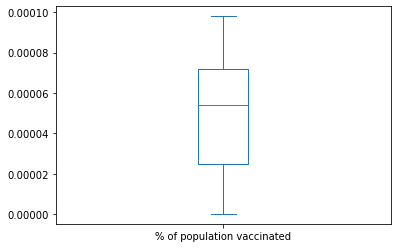

In [85]:
ax = (Vaccine[['% of population vaccinated']]/1_000_000).plot.box()

In [95]:
binnedPopulation = pd.cut(Vaccine['Doses administered per 100 people'], 10)
binnedPopulation.value_counts()

(-0.313, 31.3]    28
(187.8, 219.1]    27
(93.9, 125.2]     24
(156.5, 187.8]    24
(31.3, 62.6]      23
(125.2, 156.5]    23
(62.6, 93.9]      19
(219.1, 250.4]    16
(250.4, 281.7]     2
(281.7, 313.0]     1
Name: Doses administered per 100 people, dtype: int64

* ### Histogram

In [ ]:
ax = (Vaccine[['% of population vaccinated']]/ 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('')

In [55]:
def select_marker_color(row):
    if row['% of population fully vaccinated'] < 20.0:
        return 'pink'
    elif row['% of population fully vaccinated'] < 40.0:
        return 'blue'
    elif row['% of population fully vaccinated'] < 60.0:
        return 'purple'
    elif row['% of population fully vaccinated'] < 80.0:
        return 'green'
    return 'lightblue'

In [56]:
Vaccine['color'] = Vaccine.apply(select_marker_color, axis = 1)
Vaccine.head(5)

,Country,country code,latitude,longitude,Doses administered per 100 people,Total doses administered,% of population fully vaccinated,% of population vaccinated,color
0,Afghanistan,AF,33.9391,67.7100,15,5872684,14.0000,12.0000,pink
1,Albania,AL,41.1533,20.1683,97,2773475,45.0000,43.0000,purple
2,Algeria,DZ,28.0339,1.6596,32,13704895,17.0000,14.0000,pink
3,Angola,AO,-11.2027,17.8739,55,17535411,35.0000,19.0000,blue
4,Argentina,AR,-38.4161,-63.6167,216,97181658,91.0000,82.0000,lightblue


In [57]:
my_map = folium.Map(
    location = [13.133932434766733, 16.103938729508073],
    zoom_start = 2
)

for _, country in Vaccine.iterrows():
    folium.Marker(
        location = [country['latitude'], country['longitude']] ,
        popup = country['Country'],
        tooltip = (country['Country'], country['Total doses administered'], country['% of population vaccinated']), 
        icon = folium.Icon(color = country['color'], prefix = 'fa', icon = 'circle')
    ).add_to(my_map)

my_map

In [39]:
my_map.save('my_map.html')